**Importing necessary modules:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**Importing and reading the dataset:**

In [2]:
dataset= pd.read_csv('IRIS.csv')
print(pd.DataFrame(dataset))

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


**Data Preprocessing:**

**Data Cleaning:**

In [4]:
new_dataset = dataset.dropna()

new_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Feature Selection:**

In [7]:
print(new_dataset.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [9]:
selected_features=['sepal_length','petal_length']
X= new_dataset[selected_features]
y=new_dataset['species']

**Spliting the dataset into training and testing data:**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Choosing Model and evaluating the model:**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Accuarcy:",accuracy)
print("Classification:\n",classification)

Accuarcy: 1.0
Classification:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Feature Importance plot:**

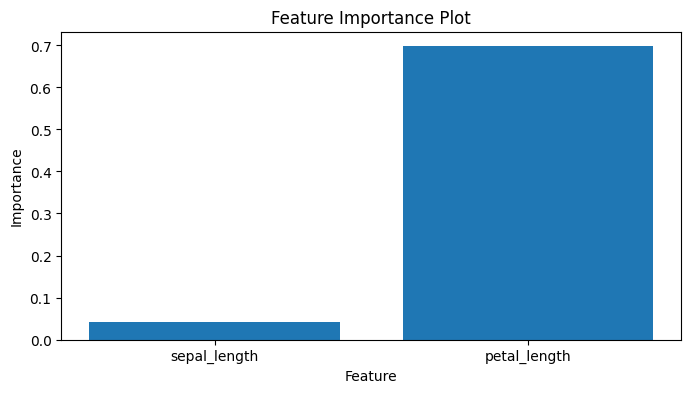

In [14]:
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
feature_importance = results.importances_mean
plt.figure(figsize=(8, 4))
plt.bar(range(len(selected_features)), feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(range(len(selected_features)), selected_features)
plt.title('Feature Importance Plot')
plt.show()